In [3]:
from ephesus.data import get_data_json, get_data_targets_json, get_data_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = get_data_csv()
data.drop(columns=["TreatmentDetected_1","AldRelated_1"], inplace=True)
data.head()

,translation,NGAP_1,Cotation_1,Hour_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
fichier,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,PSG,NaN,10:00:00,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,PSTA,NaN,18:00:00,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,PV19,NaN,11:00:00,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,PLVA,NaN,09:00:00,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",PLM,NaN,16:00:00,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN


In [7]:
data.shape

(4029, 12)

In [8]:
treatments = data[["translation","NGAP_1"]]
treatments = treatments.groupby("NGAP_1").count().sort_values(by="translation", ascending = False)
treatments["percentage"] = treatments["translation"]/len(data)
treatments["cum_per"] = treatments["percentage"].cumsum()
treatments.head()

,translation,percentage,cum_per
NGAP_1,,,
PSG,1450,0.359891,0.359891
PV19,514,0.127575,0.487466
TAID19,289,0.071730,0.559196
PSTA,230,0.057086,0.616282
PC19,222,0.055101,0.671382


In [9]:
treatments.percentage.sum()

0.9853561677835694

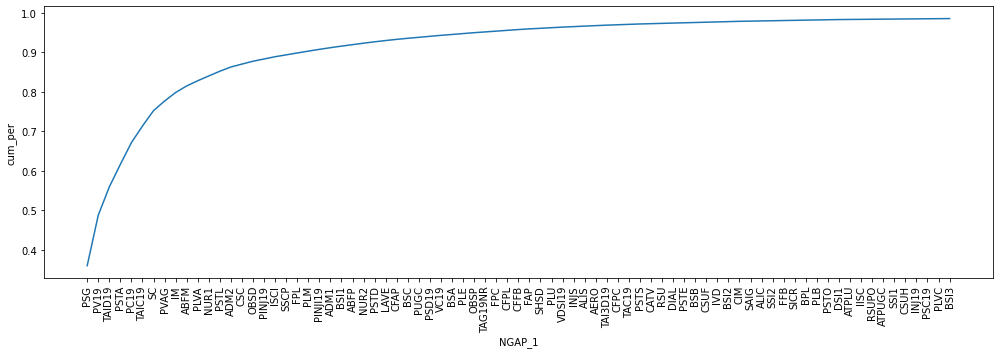

In [10]:
fig = plt.figure(figsize=(17,5))
sns.lineplot(x=treatments.index, y=treatments.cum_per)
plt.xticks(rotation=90);

In [11]:
treatments.head(15)

,translation,percentage,cum_per
NGAP_1,,,
PSG,1450,0.359891,0.359891
PV19,514,0.127575,0.487466
TAID19,289,0.071730,0.559196
PSTA,230,0.057086,0.616282
PC19,222,0.055101,0.671382
TAIC19,169,0.041946,0.713328
SC,157,0.038967,0.752296
PVAG,98,0.024324,0.776620
IM,87,0.021593,0.798213


In [12]:
treatment_list = list(treatments.head(15).index)

In [13]:
treatment_list

['PSG',
 'PV19',
 'TAID19',
 'PSTA',
 'PC19',
 'TAIC19',
 'SC',
 'PVAG',
 'IM',
 'ABFM',
 'PLVA',
 'NUR1',
 'PSTL',
 'ADM2',
 'CSC']

In [16]:
sample = data.copy()[["NGAP_1","translation"]]
sample = sample[sample["NGAP_1"].isin(treatment_list)]

In [17]:
sample

,NGAP_1,translation
fichier,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,PSG,Prise de sang faite le 19 février à domicile p...
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,PSTA,Pansement également refait le 23 mars par mylène.
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,PV19,Pcr plus prise de sang fait à domicile à 11.
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,PLVA,Prise de sang et analyse stérile des urines à ...
978eb126-14a0-46cf-bd27-44b6b77cecb7_3c344cb4-3419-4bbb-9da7-1d33d12bcc52,PSG,Prise de sang à domicile le 7 octobre.
...,...,...
a5050600-95ef-43d8-a5fa-a57c791bf843_7ee4ad79-a454-4e0b-a0e2-ef4d7661f744,TAID19,Test antigénique réalisé ce matin à domicile.
a5050600-95ef-43d8-a5fa-a57c791bf843_448853a4-f75e-403a-8fcb-8dfc18f0b4ec,TAID19,Test antigénique réalisé cet après-midi à domi...
2d035c4b-cdfa-4982-87dc-916fe07a0824_4fb0c6a1-0562-496a-ae88-1adadec059a6,PSG,Réalisation d'une prise de sang chez monsieur ...


In [18]:
sample.NGAP_1.value_counts()

PSG       1447
PV19       474
TAID19     260
PSTA       230
PC19       220
SC         157
TAIC19     155
PVAG        98
IM          87
ABFM        67
PLVA        53
NUR1        49
PSTL        48
ADM2        43
CSC         30
Name: NGAP_1, dtype: int64

In [19]:
df = pd.DataFrame()
for ngap in treatment_list:
    df = pd.concat([df, sample[sample["NGAP_1"] == ngap].sample(20, random_state=1)])
df

,NGAP_1,translation
fichier,,
9f980dcf-b431-4e67-876f-2b8e288b7900_0016fa4f-0833-4d0b-a473-0c4bcee84c6d,PSG,"monsieur Didier Nicolas, prise de sang faite l..."
9f980dcf-b431-4e67-876f-2b8e288b7900_5ce07ffe-1b1c-4932-89c0-d6c7319f4f0d,PSG,"Monsieur mathieu, jean-yves, prise de sang à a..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_117ae9b7-1e7c-46b7-abb3-0fe9ea87ec32,PSG,Prise de sang réalisée à domicile le 10 mai. À...
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_981a899b-37cc-4d0c-aa2f-5c8eddb9c4f7,PSG,Prise de sang réalisée ce matin au domicile du...
3e7ffb67-8872-4172-bf18-4fe338ecae3f_4e3ac7a9-e8a3-433e-9d7a-ee449ee69d5f,PSG,Prise de sang programmée pour le mardi 31 mars...
...,...,...
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_8b628a3f-514c-4918-a92e-175f755c271e,CSC,"Sous-cutanée 2 fois par jour, 8h 20h00, avec u..."
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b7a1d1a0-b428-49e3-a253-cc78c0233172,CSC,Alors ordonnance en date du 15 mars 2022 par l...
2206f47b-a858-4f23-8696-d10e1050f2d7_2b9a3f2e-202c-4355-8cca-84a218c60606,CSC,"Donc, pour madame Didier Denise à injection so..."


In [20]:
export = pd.DataFrame(df["translation"])
export.columns = ["text"]

In [21]:
#export.to_csv("../raw_data/sample_sentencesV1.csv", index=False)

# NOUVEL EXPORT SANS DOUBLONS

In [20]:
data = get_data_csv()
data.drop_duplicates(inplace = True)
data.shape

(3925, 14)

In [21]:
# On vérifier que l'export V1 est bien égal à df_v1 
export_v1 = pd.read_csv("../raw_data/sample_sentencesV1.csv")
export_v1.shape
df_v1 = pd.DataFrame()
for ngap in treatment_list:
    df_v1 = pd.concat([df_v1, sample[sample["NGAP_1"] == ngap].sample(20, random_state=1)])

test = pd.DataFrame(df_v1.reset_index()['translation'])
test.columns = ['text']
pd.concat([test,export_v1]).drop_duplicates(keep=False)

,text


In [22]:
#réinstanciation de sample 
sample = data.copy()
sample = sample[sample["NGAP_1"].isin(treatment_list)]
sample.shape

(3418, 14)

In [23]:
df_v1 = pd.DataFrame()
for ngap in treatment_list:
    df_v1 = pd.concat([df_v1, sample[sample["NGAP_1"] == ngap].sample(20, random_state=1)])
df_v1

,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
fichier,,,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_0016fa4f-0833-4d0b-a473-0c4bcee84c6d,"monsieur Didier Nicolas, prise de sang faite l...",NaN,PSG,NaN,08:00:00,True,2022-03-15T08:00:00,1,Days,True,Cabinet,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
9f980dcf-b431-4e67-876f-2b8e288b7900_5ce07ffe-1b1c-4932-89c0-d6c7319f4f0d,"Monsieur mathieu, jean-yves, prise de sang à a...",NaN,PSG,NaN,08:30:00,True,2021-11-03T08:30:00,1,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_117ae9b7-1e7c-46b7-abb3-0fe9ea87ec32,Prise de sang réalisée à domicile le 10 mai. À...,NaN,PSG,NaN,08:00:00,True,2021-05-10T08:00:00,8,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 16, 'KilometersNumbe..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_981a899b-37cc-4d0c-aa2f-5c8eddb9c4f7,Prise de sang réalisée ce matin au domicile du...,NaN,PSG,NaN,08:27:00,True,2022-03-26T08:27:00,1,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 8, 'KilometersNumber..."
3e7ffb67-8872-4172-bf18-4fe338ecae3f_4e3ac7a9-e8a3-433e-9d7a-ee449ee69d5f,Prise de sang programmée pour le mardi 31 mars...,NaN,PSG,NaN,11:00:00,True,2020-04-03T11:00:00,1,Days,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 10, 'KilometersNumbe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_8b628a3f-514c-4918-a92e-175f755c271e,"Sous-cutanée 2 fois par jour, 8h 20h00, avec u...",NaN,CSC,NaN,20:00:00,False,2020-12-01T08:00:00,3,Months,True,Domicile,NaN,NaN,"{'KilometersNumberPlain': 4, 'KilometersNumber..."
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b7a1d1a0-b428-49e3-a253-cc78c0233172,Alors ordonnance en date du 15 mars 2022 par l...,NaN,CSC,NaN,11:00:00,True,2022-03-16T11:00:00,21,Days,True,Domicile,NaN,NaN,NaN
2206f47b-a858-4f23-8696-d10e1050f2d7_2b9a3f2e-202c-4355-8cca-84a218c60606,"Donc, pour madame Didier Denise à injection so...",NaN,CSC,NaN,17:45:00,True,2021-12-17T17:45:00,1,Days,True,Domicile,NaN,NaN,NaN


In [24]:
df_data_et_df_v1 = pd.concat([df_v1.drop_duplicates(), data]) #Ok sur 4221 = 3925(data) + 296(df_v1)
df_data_et_df_v1.shape

(4225, 14)

In [25]:
df_data_et_df_v1.drop_duplicates().shape

(3925, 14)

In [26]:
df_diff = df_data_et_df_v1.drop_duplicates(keep=False)
df_diff.shape

(3625, 14)

In [27]:
sample_v2 = df_diff.copy()
sample_v2 = sample_v2[sample_v2["NGAP_1"].isin(treatment_list)]
sample_v2.shape

(3118, 14)

In [28]:
df_v2 = pd.DataFrame()
for ngap in treatment_list:
    df_v2 = pd.concat([df_v2, sample_v2[sample_v2["NGAP_1"] == ngap].sample(10, random_state=0)])
df_v2.shape

(150, 14)

In [29]:
#On vérifier que df_V1 et df_V2 sont bien différents
pd.concat([df_v1, df_v2]).drop_duplicates().shape

(450, 14)

In [30]:
export_v2 = df_v2[["translation"]]
export_v2.columns = ["text"]
export_v2

,text
fichier,
9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_776d7835-0f96-4b6f-89b6-c9934d9556b6,Bilan sanguin au cabinet par isabelle.
a5050600-95ef-43d8-a5fa-a57c791bf843_5c19c240-0883-4d4e-8cc2-65b53d18030a,"Bilan sanguin le 22 février matin, à domicile,..."
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b96ef5cf-112f-45fa-82ff-7e37f0cfcc63,"Prise de sang à domicile, est-ce jour le 11 mars."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_271f268a-4058-4d79-9db2-4928bc5f35a8,Prise de sang réalisée ce matin.
55d674cc-3389-4cf6-ab7c-1f1b9fa1b6ed_8a6fd178-5a31-c0ac-6c70-c15c27132294,"Prise de sang réalisé ce jour, le 19 10 2021 à..."
...,...
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_9bb9b682-a32a-4c7b-bfea-42bdca522ec3,"Injection d'EPO d'ARANESP ce jour, le 16 mars ..."
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_32868df4-0723-4c0b-bc18-12d9140a8859,Ce cutanée débutait le 9 février.
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_6e0f809f-7f58-4710-bf6b-06ec868ab155,Sous-cutanée faite le 28 février en même temps...


In [31]:
export_v1 = pd.read_csv("../raw_data/sample_sentencesV1.csv")
export_v1.shape
test = pd.concat([export_v2, export_v1]).reset_index()
test = pd.DataFrame(test['text'])
test.drop_duplicates().shape


(441, 1)

In [32]:
export_v2.to_csv("../raw_data/sample_sentencesV3.csv", index=False)